In [1]:
import os,sys
import time
import numpy as np
import pandas as pd

In [31]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFdr, SelectFpr, SelectFwe
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegression,LassoCV, Lasso
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, NMF
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import  accuracy_score,auc,average_precision_score,roc_auc_score, recall_score,f1_score, log_loss, fbeta_score, confusion_matrix, precision_recall_curve,classification_report
from xgboost import XGBClassifier
from tpot import TPOTClassifier
from ReliefF import ReliefF
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE,SMOTENC,ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE,RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.preprocessing import Normalizer,normalize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot

In [3]:
from preprocessing.Normalize import Normalize
import helper.SeriesHelper as series_helper

In [4]:
X_train,X_test,y_train,y_test = Normalize().get_train_test()

In [120]:
model = SelectKBest(k=100).fit(temp_X_train,temp_y_train)
temp_train = model.transform(temp_X_train)
temp_test = model.transform(temp_X_test)
# temp_train = temp_X_train
# temp_test = temp_X_test

In [121]:
import matplotlib.pyplot as plt

In [122]:
temp_y_train.shape

(1072,)

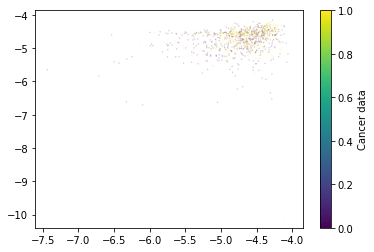

In [126]:
plt.scatter(np.log(temp_train[:,1]),np.log(temp_train[:,99]),c=list(temp_y_train[:]),s=0.01)
cbar = plt.colorbar()
cbar.set_label("Cancer data")
plt.show()


In [141]:
train = {}
test = {}
xtr = temp_X_train
ytr = temp_y_train
xte = temp_X_test
yte = temp_y_test
temp_train =  xtr
temp_test = xte


for i in range(1,2):
        mlp = MLPClassifier(hidden_layer_sizes=(1000,500,400,200,100,50,25))
        # model = SelectFromModel(DecisionTreeClassifier())
        # temp_train = model.transform(xtr)
        # temp_test = model.transform(temp_xte)
        # learner = LogisticRegression(solver='liblinear',max_iter=10000).fit(temp_train,ytr)
        model = SelectKBest(k=872).fit(xtr,ytr)
        temp_train = model.transform(xtr)
        temp_test = model.transform(xte)

        learner = mlp.fit(temp_train,ytr)
        pred_train = learner.predict(temp_train)
        pred_test = learner.predict(temp_test) 

        
        train[i] = [accuracy_score(ytr,pred_train),
                average_precision_score(ytr,pred_train),
                roc_auc_score(ytr,pred_train),
                recall_score(ytr,pred_train),
                f1_score(ytr,pred_train)]   

        test[i] = [accuracy_score(yte,pred_test),
                average_precision_score(yte,pred_test),
                roc_auc_score(yte,pred_test),
                recall_score(yte,pred_test),
                f1_score(yte,pred_test)]
        print("train *************")
        print(classification_report(ytr,pred_train))
        print("test *************")
        print(classification_report(yte,pred_test))

        print("Done k best",i)


train *************
              precision    recall  f1-score   support

           0       0.99      0.68      0.80       536
           1       0.75      0.99      0.86       536

    accuracy                           0.83      1072
   macro avg       0.87      0.83      0.83      1072
weighted avg       0.87      0.83      0.83      1072

test *************
              precision    recall  f1-score   support

           0       0.62      0.43      0.51       230
           1       0.56      0.73      0.64       230

    accuracy                           0.58       460
   macro avg       0.59      0.58      0.57       460
weighted avg       0.59      0.58      0.57       460

Done k best 1


In [142]:
f1_score(temp_y_test,learner.predict(temp_test))

0.6377358490566037

In [143]:
train_df = pd.DataFrame({
    'selected_genes' : [x for x in list(train.keys())],
    'accuracy' : [train[x][0] for x in list(train.keys())],
    'precision' : [train[x][1] for x in list(train.keys())],
    'auc' : [train[x][2] for x in list(train.keys())],
    'recall_score' : [train[x][3] for x in list(train.keys())],
    'f1_score' : [train[x][4] for x in list(train.keys())],
})
train_df.sort_values(by=['f1_score','precision','recall_score','auc','accuracy'], ascending=False)

,selected_genes,accuracy,precision,auc,recall_score,f1_score
0,1,0.834888,0.752469,0.834888,0.994403,0.857603


In [144]:
test_df = pd.DataFrame({
    'selected_genes' : [x for x in list(test.keys())],
    'accuracy' : [test[x][0] for x in list(test.keys())],
    'precision' : [test[x][1] for x in list(test.keys())],
    'auc' : [test[x][2] for x in list(test.keys())],
    'recall_score' : [test[x][3] for x in list(test.keys())],
    'f1_score' : [test[x][4] for x in list(test.keys())],
})
test_df.sort_values(by=['auc','f1_score',], ascending=False)

,selected_genes,accuracy,precision,auc,recall_score,f1_score
0,1,0.582609,0.546536,0.582609,0.734783,0.637736


In [ ]:
plt.plot('selected_genes','accuracy',data=train_df,markerfacecolor='blue',markersize=12,color='skyblue',linewidth=4)
plt.plot('selected_genes','precision',data=train_df,color='olive',linewidth=2)
plt.plot('selected_genes','auc',data=train_df,color='blue',linewidth=2, linestyle='dashed',label='toto')
plt.plot('selected_genes','recall_score',data=train_df,color='green',linewidth=2)
plt.plot('selected_genes','f1_score',data=train_df,color='green',linewidth=2)
plt.legend()

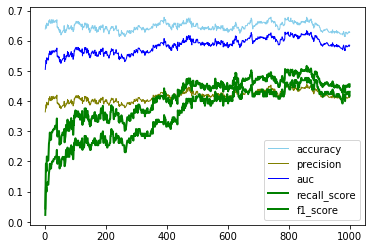

In [10]:
plt.plot('selected_genes','accuracy',data=test_df,markerfacecolor='blue',markersize=12,color='skyblue',linewidth=1)
plt.plot('selected_genes','precision',data=test_df,color='olive',linewidth=1)
plt.plot('selected_genes','auc',data=test_df,color='blue',linewidth=1)
plt.plot('selected_genes','recall_score',data=test_df,color='green',linewidth=2)
plt.plot('selected_genes','f1_score',data=test_df,color='green',linewidth=2)
plt.legend()

In [139]:
temp_X_train, temp_y_train = X_train,y_train
temp_X_test = X_test
temp_y_test = y_test

# smote = SMOTE(random_state=27,k_neighbors=30,n_jobs=5)
# temp_X_train, temp_y_train = smote.fit_sample(X_train, y_train)
# temp_X_test = X_test

# smoteenn = SMOTEENN(n_jobs=6)
# temp_X_train, temp_y_train = smoteenn.fit_sample(X_train, y_train)
# temp_X_test = X_test

# smotetomek = SMOTETomek(n_jobs=6)
# temp_X_train, temp_y_train = smotetomek.fit_sample(X_train, y_train)
# temp_X_test = X_test

# Boderline is the best until now
borderline = BorderlineSMOTE(random_state=27,k_neighbors=30,n_jobs=5,m_neighbors=10)
temp_X_train, temp_y_train = borderline.fit_sample(X_train, y_train)
temp_X_test,temp_y_test = borderline.fit_sample(X_test, y_test)

# kmeans = KMeansSMOTE(random_state=27,k_neighbors=20,n_jobs=5)
# temp_X_train, temp_y_train = kmeans.fit_sample(X_train, y_train)
# temp_X_test = X_test

# svm = SVMSMOTE(random_state=27,k_neighbors=30,n_jobs=6,m_neighbors=30)
# temp_X_train, temp_y_train = svm.fit_sample(X_train, y_train)
# temp_X_test = X_test

# smotenc = SMOTENC(categorical_features=list(np.arange(1,100)),random_state=27,n_jobs=5)
# temp_X_train, temp_y_train = smotenc.fit_sample(X_train, y_train)
# temp_X_test = X_test

# adasyn = ADASYN(random_state=27)
# temp_X_train, temp_y_train = adasyn.fit_sample(X_train, y_train)
# temp_X_test = X_test

# random  = RandomOverSampler(random_state=27)
# temp_X_train, temp_y_train = random.fit_sample(X_train, y_train)
# temp_X_test = X_test

std_scale = normalize(temp_X_train)
temp_X_train = normalize(temp_X_train)
temp_X_test = normalize(temp_X_test)

# best =  SelectKBest(score_func=f_classif ,k=860).fit(temp_X_train,temp_y_train)
# temp_X_train = best.transform(temp_X_train)
# temp_X_test = best.transform(temp_X_test)

In [140]:
temp_X_train.shape,X_train.shape,temp_X_test.shape,X_test.shape

((1072, 11035), (837, 11035), (460, 11035), (360, 11035))

In [8]:
select_from_models = {'dtc' : DecisionTreeClassifier(),
                        'etc' : ExtraTreeClassifier(),
                        'lr_elasticnet' : LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.7),
                        'lr_l1' : LogisticRegression(solver='liblinear', penalty='l1',max_iter=10000),
                        'lr_l2' : LogisticRegression(solver='liblinear',penalty='l2'),
                        'lr' : LogisticRegression(),
                        'lsvc' : LinearSVC(),
                        'rfc' : RandomForestClassifier(),
                        'sgd' : SGDClassifier(penalty='elasticnet'),
                        'lcv' : LassoCV(),
                        'lda' : LinearDiscriminantAnalysis(),
                        }
select_from_models['lda_lsqr'] =  LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None)
select_from_models['lda_lsqr_auto'] =  LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
select_from_models['qda'] = QuadraticDiscriminantAnalysis()

for penalty in ["l2", "l1"]:
    # Train Liblinear model
    select_from_models['lsvc_'+str(penalty)] = LinearSVC(penalty=penalty, dual=False,tol=1e-3)
    # Train SGD model
    select_from_models['sgd_'+str(penalty)] = SGDClassifier(alpha=.0001, max_iter=100,penalty=penalty)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [9]:
models = {}

models['lr_liblinear'] = LogisticRegression(solver='liblinear')
models['lsvc']  = LinearSVC()
models['lr'] = LogisticRegression()
models['lr_elasticnet'] = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.7)
models['lr_l1'] = LogisticRegression(solver='liblinear', penalty='l1')
models['lr_l2'] = LogisticRegression(solver='liblinear',penalty='l2')
models['dtc'] = DecisionTreeClassifier()
models['etc'] = ExtraTreeClassifier()
models['svc'] = SVC(probability=True)
models['rfc'] = RandomForestClassifier()
models['ridge'] = RidgeClassifier()
models['perceptron'] = Perceptron()
models['passive_aggressive_classifier'] = PassiveAggressiveClassifier()
models['nc'] = NearestCentroid()
models['lda'] = LinearDiscriminantAnalysis()
models['lda_lsqr'] =  LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None)
models['lda_lsqr_auto'] =  LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
models['qda'] = QuadraticDiscriminantAnalysis()
models['sgd_elasticnet'] = SGDClassifier(alpha=.0001, max_iter=100,penalty="elasticnet", loss="modified_huber")

for n in range(1,101):
    models['knn_'+str(n)] = KNeighborsClassifier(n_neighbors=n,n_jobs=6)


for penalty in ["l2", "l1"]:
    # Train Liblinear model
    models['lsvc_'+str(penalty)] = LinearSVC(penalty=penalty, dual=False,tol=1e-3)
    # Train SGD model
    models['sgd_'+str(penalty)] = SGDClassifier(alpha=.0001, max_iter=100,penalty=penalty,loss="modified_huber")

temp = {'dtc' : DecisionTreeClassifier(max_depth=10),'etc' : ExtraTreeClassifier(),'svc': SVC()}
for x in temp.keys():
    models['adaboost_'+x] = AdaBoostClassifier(base_estimator=temp[x],algorithm='SAMME')
models['mnb'] = MultinomialNB()
models['bnb'] = BernoulliNB()
models['cnb'] = ComplementNB()

models['mlp'] = MLPClassifier()
models['rnc'] = RadiusNeighborsClassifier()

In [10]:
def prediction(model,X_test,y_test):
    y_pred = np.abs(np.round(model.predict(X_test)))
    l = []
    try:
        tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
        l.append([[tp,fp],[fn,tn]])
        l.append(average_precision_score(y_test, y_pred))
        l.append(recall_score(y_test, y_pred))
        l.append(f1_score(y_test,y_pred))        
        l.append(fbeta_score(y_test, y_pred,average='weighted', beta=0.5))
        l.append(accuracy_score(y_test, y_pred))
        l.append(log_loss(y_test, y_pred))
        l.append(roc_auc_score(y_test,y_pred))
    except Exception as e:
        print(e)
        print(model,"\n\n",y_pred)

    return l 


In [188]:
df_result_cols = ['model_dict_name','model_name','selectfrommodel_name','selectfrommodel','confusion','precision','recall_score','f1_score','fbeta_score','accuracy','log_loss','roc_auc_score']
df_result_rows = []
from scikitplot.metrics import plot_precision_recall
for sfm_k in select_from_models.keys():
    selectfrommodel = SelectFromModel(select_from_models[sfm_k]).fit(temp_X_train,temp_y_train)
    _X_train = selectfrommodel.transform(temp_X_train)
    _X_test = selectfrommodel.transform(temp_X_test)
    if(_X_train.shape[1]>0 and _X_test.shape[1]>0):
        for m_k in models.keys():               
                models[m_k] = models[m_k].fit(_X_train,temp_y_train)
                df_result_rows.append( [m_k,models[m_k],sfm_k,select_from_models[sfm_k]] +
                                        prediction(models[m_k],_X_test,y_test) )
    else:
        print([sfm_k,select_from_models[sfm_k]])
        print('--------------'*5,'\n','--------------'*5)

['lr_l1', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)]
---------------------------------------------------------------------- 
 ----------------------------------------------------------------------


In [189]:
sort_by = ['f1_score','precision','recall_score','fbeta_score','log_loss','accuracy','roc_auc_score']
df = pd.DataFrame(data = df_result_rows,columns=df_result_cols).sort_values(by=sort_by,ascending=False)
# set(list(df[0:1000]['model_dict_name']))
df

,model_dict_name,model_name,selectfrommodel_name,selectfrommodel,confusion,precision,recall_score,f1_score,fbeta_score,accuracy,log_loss,roc_auc_score
1184,knn_35,"KNeighborsClassifier(algorithm='auto', leaf_si...",lda,"LinearDiscriminantAnalysis(n_components=None, ...","[[121, 181], [9, 49]]",0.397924,0.930769,0.560185,0.502087,0.472222,18.229201,0.571906
1186,knn_37,"KNeighborsClassifier(algorithm='auto', leaf_si...",lda,"LinearDiscriminantAnalysis(n_components=None, ...","[[121, 186], [9, 44]]",0.391850,0.930769,0.553776,0.478877,0.458333,18.708917,0.561037
1185,knn_36,"KNeighborsClassifier(algorithm='auto', leaf_si...",lda,"LinearDiscriminantAnalysis(n_components=None, ...","[[118, 179], [12, 51]]",0.393965,0.907692,0.552693,0.499652,0.469444,18.325137,0.564716
1042,knn_19,"KNeighborsClassifier(algorithm='auto', leaf_si...",lcv,"LassoCV(alphas=None, copy_X=True, cv=None, eps...","[[126, 200], [4, 30]]",0.385722,0.969231,0.552632,0.420487,0.433333,19.572418,0.549833
294,knn_27,"KNeighborsClassifier(algorithm='auto', leaf_si...",lr_elasticnet,"LogisticRegression(C=1.0, class_weight=None, d...","[[125, 199], [5, 31]]",0.384853,0.961538,0.550661,0.423051,0.433333,19.572415,0.548161
1044,knn_21,"KNeighborsClassifier(algorithm='auto', leaf_si...",lcv,"LassoCV(alphas=None, copy_X=True, cv=None, eps...","[[125, 199], [5, 31]]",0.384853,0.961538,0.550661,0.423051,0.433333,19.572415,0.548161
300,knn_33,"KNeighborsClassifier(algorithm='auto', leaf_si...",lr_elasticnet,"LogisticRegression(C=1.0, class_weight=None, d...","[[123, 194], [7, 36]]",0.386564,0.946154,0.550336,0.444928,0.441667,19.284581,0.551338
1671,knn_18,"KNeighborsClassifier(algorithm='auto', leaf_si...",sgd_l1,"SGDClassifier(alpha=0.0001, average=False, cla...","[[123, 194], [7, 36]]",0.386564,0.946154,0.550336,0.444928,0.441667,19.284581,0.551338
155,knn_14,"KNeighborsClassifier(algorithm='auto', leaf_si...",etc,"ExtraTreeClassifier(ccp_alpha=0.0, class_weigh...","[[118, 181], [12, 49]]",0.391553,0.907692,0.550117,0.490903,0.463889,18.517024,0.560368
1040,knn_17,"KNeighborsClassifier(algorithm='auto', leaf_si...",lcv,"LassoCV(alphas=None, copy_X=True, cv=None, eps...","[[125, 200], [5, 30]]",0.383711,0.961538,0.549451,0.416837,0.430556,19.668359,0.545987


In [14]:
pipes = []
for x in df.index[0:20]:
    if df.iloc[x]['model_dict_name'] not in ['perceptron','ridge','passive_aggressive_classifier','lsvc','lsvc_l1','lsvc_l2','nc']:
        pipes.append(("p"+str(x),Pipeline([
            ['feature_selection',SelectFromModel(df.iloc[x]['selectfrommodel'])],
            ['model',df.iloc[x]['model_name']],
        ])))

In [15]:
v = VotingClassifier(estimators=[
    # ('perceptron',Perceptron()),
    ('etc',ExtraTreeClassifier()),
    ('dtc',DecisionTreeClassifier()),    
    ('lr',LogisticRegression()),
    ('svc', SVC(probability=True)),
    # ('lsvc',LinearSVC()),
    ('rfc',RandomForestClassifier()),
    ('mnb',MultinomialNB()),
],voting='soft')
v = v.fit(temp_X_train,temp_y_train)

In [16]:
prediction(v,temp_X_test,temp_y_test)

[[[57, 58], [73, 172]],
 0.42010219249349684,
 0.43846153846153846,
 0.46530612244897956,
 0.6285213459712689,
 0.6361111111111111,
 12.56840578995625,
 0.5931438127090302]

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
# from tensorflow.keras import optimizers
# m = 0
# m = Sequential()
# m.add(Dense(temp_X_train.shape[1],activation='relu',kernel_initializer='random_normal',input_dim=temp_X_train.shape[1]))
# m.add(Dense(int(temp_X_train.shape[1]/2),activation='relu', kernel_initializer='random_normal'))
# m.add(Dense(int(temp_X_train.shape[1]/4),activation='sigmoid', kernel_initializer='random_normal'))
# m.add(Dense(int(temp_X_train.shape[1]/8),activation='relu', kernel_initializer='random_normal'))
# m.add(Dense(1,activation='sigmoid', kernel_initializer='random_normal'))
# adam = optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# m.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy','mse'])
# m.fit(temp_X_train,temp_y_train,validation_data=(temp_X_test,y_test),batch_size=5,epochs=200)


# Use Bagging and Boosting, ensemble learning in future

In [152]:
knn = KNeighborsClassifier(n_neighbors=35,n_jobs=6)
select_from_model = SelectFromModel(LinearDiscriminantAnalysis())
feature_union = FeatureUnion([
    ('select_from_model',SelectFromModel(estimator=LinearDiscriminantAnalysis())),
    # ('nmf',NMF(n_components=1))
])
pipes = Pipeline([
    ('feature_union',feature_union),
    ('model',KNeighborsClassifier(n_neighbors=35,n_jobs=6))
])

params = {
    'feature_union__select_from_model__estimator' : [LinearDiscriminantAnalysis(),LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None),LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),RandomForestClassifier(),LinearSVC(),QuadraticDiscriminantAnalysis()],
    # 'feature_union__nmf__n_components':[i for i in range(1,101)],
    'model__n_neighbors':[i for i in range(20,40)]
}

grid = GridSearchCV(estimator=pipes,param_grid=params,scoring=['f1','recall','average_precision','precision','roc_auc'],n_jobs=6,verbose=1,refit='f1')


In [153]:
grid.fit(temp_X_train,temp_y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 729.3min


KeyboardInterrupt: 

In [4]:
def load_pickle(filename):
    with open(filename+'.pickle', 'rb') as config_dictionary_file:
        return pickle.load(config_dictionary_file)

In [8]:
grid = load_pickle("grid_search_result_main4_")

In [155]:
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feature_union',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('select_from_model',
                                                                        SelectFromModel(estimator=LinearDiscriminantAnalysis(n_components=None,
                                                                                                                             priors=None,
                                                                                                                             shrinkage=None,
                                                                                                                             solver='svd',
                                                                                                                             store_covaria

In [10]:
grid.best_score_

0.7136819382690869

In [11]:
mean_test = []
mean_train = []
mean_other = []
for x in grid.cv_results_.keys():
    if "mean_test" in x:
        mean_test.append(x)
    if "mean_train" in x :
        mean_train.append(x)
    if "mean" in x:
        mean_other.append(x)

In [12]:
custom_index = 0
custom_index_of = "test_average_precision"
custom_index_of = "test_precision"
custom_index_of = "f1"
for x in mean_test:
    res = grid.cv_results_[x]
    max_index = list(res).index(max(res))
    if custom_index_of in x:
        custom_index = max_index
# custom_index = 11000
for x in mean_test:
    res = grid.cv_results_[x]
    max_index = list(res).index(max(res))
    print(x,"\t",res,'\t',max(res),'\n Max Index ::',max_index)
    print("Custom Index ::: ",custom_index," out of ",len(list(res))," :::: ",list(res)[custom_index])
    print("----------"*12)
    print("----------"*12)

mean_test_precision 	 [0.54670715 0.54263857 0.54484329 ... 0.66926822 0.66175531 0.64885934] 	 0.7412384250191612 
 Max Index :: 12823
Custom Index :::  364  out of  15000  ::::  0.6340522826110662
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
mean_test_recall 	 [0.93660436 0.94404638 0.92542402 ... 0.51715126 0.5226722  0.52457598] 	 0.945932848736587 
 Max Index :: 91
Custom Index :::  364  out of  15000  ::::  0.8173070266528211
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
mean_test_f1 	 [0.69024789 0.6890131  0.68563151 ... 0.57822194 0.57550707 0.57242826] 	 0.7136819382690869 
 Max Index :: 36

In [13]:
grid.cv_results_['param_feature_union__select_from_model__estimator'][364]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
grid.cv_results_['params'][364]

{'model__n_neighbors': 24,
 'feature_union__nmf__n_components': 3,
 'feature_union__select_from_model__estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')}

In [1]:
a= 5
import pickle
def add_pickle(obj,filename):
    with open(filename+'.pickle', 'wb') as config_dictionary_file:
        pickle.dump(obj,config_dictionary_file)

In [5]:
add_pickle(a,"a")

In [2]:
import pandas as pd

In [1]:
boderline = load_pickle("__stacked_lda__py__comparision_")

NameError: name 'load_pickle' is not defined

In [2]:
boderline[0]

NameError: name 'boderline' is not defined

In [81]:
df = pd.DataFrame(columns=['no_of_genes','score_func','accuracy','precision','recall_score','f1_score','roc_auc'],data=boderline)

In [82]:
df.sort_values(by=['accuracy'],ascending=False)

,no_of_genes,score_func,accuracy,precision,recall_score,f1_score,roc_auc
4,921,chi2,0.619565,0.577180,0.530435,0.582339,0.619565
5,921,f_classif,0.608696,0.567668,0.552174,0.585253,0.608696
1,36,chi2,0.565217,0.537015,0.547826,0.557522,0.565217
8,921,mutual_info_classif,0.560870,0.535631,0.417391,0.487310,0.560870
3,36,f_classif,0.547826,0.526371,0.513043,0.531532,0.547826
2,21,f_classif,0.545652,0.524938,0.539130,0.542670,0.545652
0,21,chi2,0.534783,0.518513,0.573913,0.552301,0.534783
6,21,mutual_info_classif,0.500000,0.500000,0.000000,0.000000,0.500000
7,36,mutual_info_classif,0.500000,0.500000,0.000000,0.000000,0.500000
